# Reversion to the mean strategy

## what is it?

It's a very a simple strategy in which we assume that if the price of an asset is below the 'mean', it will rise and if it is above the 'mean' it will drop over.

## What is the mean?

That is up to you and everyone will have a different definition of the mean depending on the asset. It is usually agreed upon that when using a cryptocurrency or stock, the mean is calculated using a CMA (cumilitative market analysis) or EMA (exponential moving average) of a certain period of time. The period of time can be dependent on how long you want to hold such asset, however anything lower than a few days will be exponentially less predictable

## When does it work? when does it not work?

It can only work if the market is bullish over the long term. If you're buying above the mean at an all time high, there is a higher chance taht you will lose money over the long term

## How can I get the most out of this strategy?

To get the most out of this strategy, a rule of thumb is that the longer the data period and the longer the EMA or CMA, the more accurate the trend line will be. Also, unless there is an underlying reason the asset has dropped, the lower below the mean, the more it's expected to rise. This is especially true in crypto currencies as they are more volatile in both directions. The only obvious caveat is that some crypto's are shitcoins with no functionality and they may never rise once they have pumped.

In [82]:
#import modules 
import pandas as pd
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# First import the libraries that we need to use
import pandas as pd
import requests
import json


def fetch_OHLC_data(symbol, timeframe):
    """This function will get Open/High/Low/Close, Volume and tradecount data for the pair passed and save to CSV"""
    pair_split = symbol.split('/')  # symbol must be in format XXX/XXX ie. BTC/USD
    symbol = pair_split[0] + pair_split[1]
    url = f'https://api.kraken.com/0/public/OHLC?pair={symbol}&interval={timeframe}'
    response = requests.get(url)
    if response.status_code == 200:  # check to make sure the response from server is good
        j = json.loads(response.text)
        result = j['result']
        keys = []
        for item in result:
            keys.append(item)
        if keys[0] != 'last':
            data = pd.DataFrame(result[keys[0]],
                                columns=['unix', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'tradecount'])
        else:
            data = pd.DataFrame(result[keys[1]],
                                columns=['unix', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'tradecount'])

        data['date'] = pd.to_datetime(data['unix'], unit='s')
        data['volume_from'] = data['volume'].astype(float) * data['close'].astype(float)

        # if we failed to get any data, print an error...otherwise write the file
        if data is None:
            print("Did not return any data from Kraken for this symbol")
        else:
            if timeframe == '1':
                tf = 'minute'
            elif timeframe == '60':
                tf = 'hour'
            elif timeframe == '1440':
                tf = 'day'
            else:
                tf = ''
            data.to_csv(f'Kraken_{symbol}_{tf}.csv', index=False)
    else:
        print("Did not receieve OK response from Kraken API")



                 

In [128]:
#Create dataframe from API query to Kraken

symbol = "BTC"
param = f"{symbol}/USD"
timeframe_value = 1440
fetch_OHLC_data(param,timeline_value)
csv_data = pd.read_csv(f'./Kraken_{symbol}USD_.csv')
df = pd.DataFrame(csv_data)
df.set_index(['date'],inplace=True)
df.drop(columns=['unix','tradecount','volume_from','volume','vwap',], inplace=True)
df

,open,high,low,close
date,,,,
2022-01-26 21:49:00,36447.4,36458.6,36442.3,36442.4
2022-01-26 21:50:00,36442.3,36442.4,36381.7,36388.1
2022-01-26 21:51:00,36389.1,36462.4,36389.1,36419.7
2022-01-26 21:52:00,36431.5,36463.2,36431.5,36463.1
2022-01-26 21:53:00,36463.1,36516.3,36433.7,36433.7
...,...,...,...,...
2022-01-27 09:44:00,36594.3,36621.7,36594.2,36621.7
2022-01-27 09:45:00,36624.7,36625.7,36623.9,36625.1
2022-01-27 09:46:00,36625.1,36646.8,36625.1,36642.7


<AxesSubplot:title={'center':'BTC/USD'}, xlabel='date'>

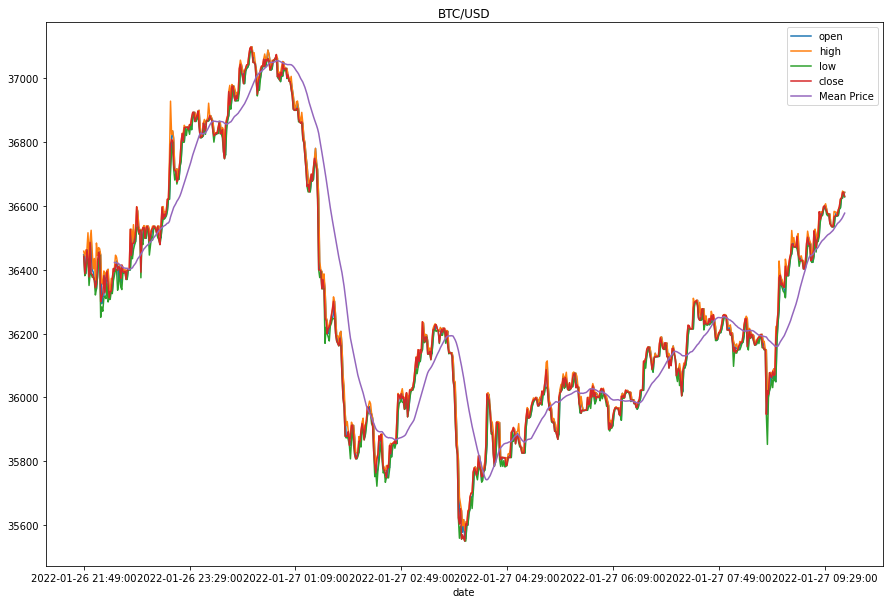

In [129]:
CMA = 30
df['Mean Price'] = df.iloc[:,1].rolling(window=CMA).mean().round(2)
line_graph = df.plot(figsize=(15,10),title=param)


line_graph

In [130]:
final_price = df

closed_price = final_price['close'].values[-1]
mean_price = final_price['Mean Price'].values[-1]

print(f"closed price: {closed_price}")
print(f"mean price: {mean_price}")




if closed_price > mean_price:
    perc_price_diff = (closed_price - mean_price) / 100
    USD_price_diff = closed_price - mean_price
    print(f"The closed price is above the mean by {round(perc_price_diff, 2)} percent ({round(USD_price_diff,2)} USD), it is not recommended to buy at this time")
else:
    perc_price_diff =  (mean_price -closed_price) / 100
    USD_price_diff =  (mean_price -closed_price)
    print(f"The closed price is below the mean by {round(perc_price_diff,2)} percent ({round(USD_price_diff,2)} USD), it is probably a good time to buy at this price")    




closed price: 36630.4
mean price: 36577.68
The closed price is above the mean by 0.53 percent (52.72 USD), it is not recommended to buy at this time
